<a href="https://colab.research.google.com/github/RebatiGaire/Simulation-And-Modeling/blob/master/Chi_Square_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [105]:
import numpy as np
from scipy.stats import chi2
import matplotlib.pyplot as plt
%matplotlib inline

# Generate Pseudo Random Numbers

In [106]:
a = 16805
c = 0
m = 2147483647
r0 = 123457
sample_size = 100

In [107]:
def lcg(a, r0, c, m):
  for i in range(sample_size):
    rn = (a * r0 + c) % m
    yield rn / m
    r0 = rn
    

In [108]:
rn = np.array(list(lcg(a, r0, c, m))) * 100


In [109]:
# Random Number Sample

# rn = [36, 91, 51, 2, 54, 6, 58, 6, 58, 2,
#       54, 1, 48, 97, 43, 22, 83, 25, 79, 95,
#       42, 87, 73, 17, 2, 42, 95, 38, 79, 29,
#       65, 9, 55, 97, 39, 83, 31, 77, 17, 62,
#       3, 49, 90, 37, 13, 17, 58, 11, 51, 92,
#       33, 78, 21, 66, 9, 54, 49, 90, 35, 84,
#       26, 74, 22, 62, 12, 90, 36, 83, 32, 75,
#       31, 94, 34, 87, 40, 7, 58, 5, 56, 22,
#       58, 77, 71, 10, 73, 23, 57, 13, 36, 89,
#       22, 68, 2, 44, 99, 27, 81, 26, 85, 22]

# Visualization

Text(0, 0.5, 'Value')

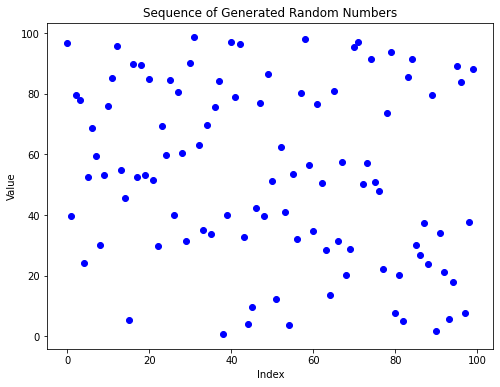

In [110]:
# Data Visualization

plt.figure(figsize= (8, 6))
plt.plot(rn, 'bo')
plt.title('Sequence of Generated Random Numbers')
plt.xlabel('Index')
plt.ylabel('Value')


# Chi-Square Test

In [111]:
# Chi-Square Test
def data_to_freq(data, no_of_classes, class_size):
  count = np.zeros(shape=(no_of_classes))
  
  for i in range(no_of_classes):
    for no in data:
      if (class_size * i <= no < class_size * (i+1)):
        count[i] += 1

  return count 

In [112]:
def chi_square_test(data, sample_size, no_of_classes, class_size):

  obs_freq = data_to_freq(data, no_of_classes, class_size)
  exp_freq = np.full(shape= (no_of_classes), fill_value= sample_size / no_of_classes)
  print(f'Observed Frequency : {obs_freq}')
  print(f'Expected Frequency : {exp_freq}')
  chisquare_value = (((obs_freq - exp_freq)**2) / exp_freq).sum()

  return chisquare_value

In [113]:
sample_size = len(rn)
no_of_classes = 10
class_size = sample_size / no_of_classes

alpha = 0.05
dof = no_of_classes - 1

In [114]:
cal_chisquare = chi_square_test(rn, sample_size, no_of_classes, class_size)
critical_chisquare = chi2.isf(df= dof, q= alpha)


print(f"Calculated Chi-Square value : {cal_chisquare}")
print(f"Critical Chi-Square value : {critical_chisquare}")
if (cal_chisquare <= critical_chisquare):
  print("Not enough evidences to reject Null Hypothesis i.e. The generated sequence of Random Number is distributed Uniformly.")
else:
  print("Null Hypothesis is rejected i.e. The generated sequence of Random Number isnot distributed Uniformly.")


Observed Frequency : [10.  3. 10. 16.  4. 16.  6.  9. 14. 12.]
Expected Frequency : [10. 10. 10. 10. 10. 10. 10. 10. 10. 10.]
Calculated Chi-Square value : 19.4
Critical Chi-Square value : 16.91897760462045
Null Hypothesis is rejected i.e. The generated sequence of Random Number isnot distributed Uniformly.
